## 测试新的方法，依据Zak的文献报道中的数值公式， 以及修正之前的策略：在delta-hedging的时候，hedge到modified Delta， Re-Hedging的时候到Band的边缘
1. 验证Modified_Delta, H_0, H_w等值

In [1]:
from deltaHedging import *
import random
test_mc = monte_carlo_parallel_3(path_num=100)
steps = test_mc.shape[1]
paths = 100
sigma = 0.3
one_side_cost = 0.0025
utility_gamma = 0.1
K = 100
r = 0.04
id = 0
rand_steps = list(range(steps))
random.shuffle(rand_steps)
for step in rand_steps[:3]:
	id += 1
	path = random.randint(0, 99)
	T_left = test_mc[path * 7 + 0, step]
	S_price = test_mc[path * 7 + 1, step]
	BS_delta = test_mc[path * 7 + 2, step]
	BS_gamma = test_mc[path * 7 + 3, step]
	Mod_delta = test_mc[path * 7 + 4, step]
	H_0 = test_mc[path * 7 + 5, step]
	H_w = test_mc[path * 7 + 6, step]
	print ('Test {}: \nParas {}'.format(id, tuple((path, T_left, S_price, BS_delta, BS_gamma))))
	mod_sigma = sigma * np.sqrt( 1 + 6.85 * ( one_side_cost ** 0.78 * T_left ** 0.1 ) / ( sigma ** 0.25 * np.exp(0.2*T_left) ) * np.power(utility_gamma*abs(BS_gamma)*S_price**2,0.15))
	Mod_delta_comp = norm.cdf(d_j(1, S_price, K, r, mod_sigma, T_left))
	H_0_comp = one_side_cost / ( utility_gamma * S_price * sigma ** 2 * T_left )
	H_w_comp = 1.18 * one_side_cost ** 0.31 * T_left ** 0.1 * (abs(BS_gamma) / utility_gamma) ** 0.5 / (sigma**0.25 * np.exp(0.15*T_left))
	print ('Mod_sigma: {} , computed: {}'.format(Mod_delta, Mod_delta_comp))
	print ('H_0: {} , computed: {}'.format(H_0, H_0_comp))
	print ('H_w: {} , computed: {}'.format(H_w, H_w_comp))
	


Test 1: 
Paras (37, 0.01944521111111111, 96.22404474391001, 0.18927233026279033, 0.06725397202508453)
Mod_sigma: 0.20201471814945643 , computed: 0.20201471814945643
H_0: 0.14845718739670977 , computed: 0.14845718739670974
H_w: 0.1372260586311326 , computed: 0.1372260586311326
Test 2: 
Paras (17, 0.031250625, 113.3818425853181, 0.9922019257305339, 0.00356428799519605)
Mod_sigma: 0.9901720402813248 , computed: 0.9901720402813248
H_0: 0.07839624857020627 , computed: 0.07839624857020626
H_w: 0.03306736315089813 , computed: 0.03306736315089813
Test 3: 
Paras (71, 0.04791709166666666, 101.07112574972628, 0.5887231825901121, 0.05861319887638467)
Mod_sigma: 0.585444841854889 , computed: 0.585444841854889
H_0: 0.05735614389332886 , computed: 0.05735614389332886
H_w: 0.13960093728178777 , computed: 0.13960093728178777


###2. Zak Band: 用Zak文章中的rehedging方法进行monte carlo模拟,

In [4]:
from deltaHedging import *
results = delta_hedging_methods(
    T=T_EXPIRATION,
    daily_step=DAILY_STEPS,
    mu=MU,
    realized_sigma=REALIZED_VOL,
    implied_sigma=IMPLIED_VOL,
    S_0=SPOT_0,
    K=STRIKE,
    r=INTEREST_RATE,
    optionPosi=OPTION_POSITION,
    optionType=OPTION_TYPE,
    path_num=MC_PATHS_NUM,
    one_side_cost=ONE_SIDE_COST
    )
results['Zak_Band']

(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 196.06 seconds
Start to do the Zak band method...
Zak band method spend: 160.13 seconds


,utility_gamma,avg_PnL,vola_PnL,avg_trans_cost,vola_trans_cost,avg_hedged,vola_hedged,avg_payoff,vola_payoff
0,0.15,-0.206214,1.101734,0.368988,0.094830,-0.356120,5.013290,0.149906,5.332039
1,0.50,-0.312876,0.636848,0.475284,0.130977,-0.503731,5.147044,0.190855,5.300874
2,1.00,-0.391469,0.499162,0.552612,0.157685,-0.562506,5.214307,0.171037,5.315815
3,5.00,-0.584309,0.361133,0.747469,0.226198,-0.755312,5.274119,0.171003,5.312210
4,15.00,-0.694830,0.340062,0.858955,0.260205,-0.856905,5.312791,0.162075,5.334483


In [5]:
results['Zak_Band'].drop(['vol_hedged'], axis=1)

,utility_gamma,avg_PnL,vola_PnL,avg_trans_cost,vola_trans_cost,avg_hedged,avg_payoff,vola_payoff,vola_hedged
0,0.15,-0.202904,1.105545,0.368907,0.094898,-0.355048,0.152144,5.333892,5.011653
1,0.50,-0.313354,0.635597,0.476638,0.130815,-0.459929,0.146575,5.321288,5.164568
2,1.00,-0.393791,0.498047,0.552686,0.158336,-0.543131,0.149340,5.339582,5.237099
3,5.00,-0.584255,0.362907,0.747543,0.226452,-0.726099,0.141843,5.349508,5.309377
4,15.00,-0.694512,0.340598,0.859316,0.259766,-0.863425,0.168913,5.303629,5.281610


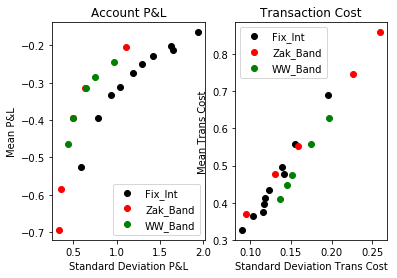

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.facecolor']=(1,1,1,1)
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Account P&L')
ax1.set_xlabel('Standard Deviation P&L')
ax1.set_ylabel('Mean P&L')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Transaction Cost')
ax2.set_xlabel('Standard Deviation Trans Cost')
ax2.set_ylabel('Mean Trans Cost')
ax1.plot(results['fixed_interval']['vola_PnL'], results['fixed_interval']['avg_PnL'], 'ko', label='Fix_Int')
ax1.plot(results['Zak_Band']['vola_PnL'], results['Zak_Band']['avg_PnL'],  'ro', label='Zak_Band')
ax1.plot(results['WW_Band']['vola_PnL'], results['WW_Band']['avg_PnL'], 'go', label='WW_Band')
ax2.plot(results['fixed_interval']['vola_trans_cost'], results['fixed_interval']['avg_trans_cost'], 'ko', label='Fix_Int')
ax2.plot(results['Zak_Band']['vola_trans_cost'], results['Zak_Band']['avg_trans_cost'], 'ro', label='Zak_Band')
ax2.plot(results['WW_Band']['vola_trans_cost'], results['WW_Band']['avg_trans_cost'], 'go', label='WW_Band')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

###用Volatility Trading书上给出的Zak Band数值公式进行模拟


In [9]:
 def new_delta_hedging_methods(T, daily_step, mu, sigma, S_0, K, r, optionPosi, optionType, path_num, one_side_cost):
	"""
	:param: pass
	:return: dict,
			dict['fixed_interval'] : DataFrame for different parameters
			dict['WW_Band'] : DataFrame
			dict['Zak_Band'] : DataFrame
			DataFrame(columns=[ 'para_names', 'avg_PnL', 'vola_PnL', 'avg_trans_cost', 'vola_trans_cost', 'avg_hedged', 'vol_hedged' ]
	"""
	MC_Paths = monte_carlo_parallel_2(T, daily_step, mu, sigma, S_0, K, r, optionType, path_num, one_side_cost, 0.1)  # np.array( (7 * N), steps )
	print( MC_Paths.shape )
	# construct the option and account that we want to delta-hedging with
	if optionType == 'call':
		opt_price = vanilla_call_price(S_0, K, r, sigma, T / 360)
	else:  # put option
		opt_price = vanilla_put_price(S_0, K, r, sigma, T / 360)
	option = Option(opt_price, K, optionType)
	account = Account(100, optionPosi, option, one_side_cost)

	###			Test different methods to delta_hedging
	return_results = {}
	print("Start to do the fixed interval re-hedging method...")

	##			Fixed Interval Method
	#				method parameter: interval -> 1 day , 5 day, 10 day, 15 day
	fixed_results = DataFrame(
		columns=['interval_days', 'avg_PnL', 'vola_PnL', 'avg_trans_cost', 'vola_trans_cost', 'avg_hedged',
				 'vola_hedged', 'avg_payoff', 'vola_payoff'])
	for interval in [1, 2, 3, 4, 5, 6, 8, 10, 12, 15]:
		print ('Test the interval of {} day(s)...'.format(interval))
		result = Hedging_Method(account.copy(), MC_Paths, 'fixed_interval', interval)
		result['interval_days'] = interval
		fixed_results = fixed_results.append(result, ignore_index=True)
	return_results['fixed_interval'] = fixed_results

	##			Utility-based Method
	# 				method parameter: utility_gamma
	utility_gamma_range = [0.15, 0.5, 1, 5, 15]
	mc_paths = {}
	print("Start to generate the paths under utilities:{}".format(utility_gamma_range))
	for utility_gamma in utility_gamma_range:
		mc_paths[utility_gamma] = monte_carlo_parallel_2(T, daily_step, mu, sigma, S_0, K, r, optionType, path_num, one_side_cost, utility_gamma)


	#				1. Zakamouline Solution
	time_zak_0 = time.time()
	print("Start to do the Zak band method...")
	zak_band_results = DataFrame(
		columns=['utility_gamma', 'avg_PnL', 'vola_PnL', 'avg_trans_cost', 'vola_trans_cost', 'avg_hedged',
				 'vola_hedged', 'avg_payoff', 'vola_payoff'])
	for utility_gamma in utility_gamma_range:
		result = Hedging_Method(account.copy(), mc_paths[utility_gamma], "Zak_Band", utility_gamma)
		result['utility_gamma'] = utility_gamma
		zak_band_results = zak_band_results.append(result, ignore_index=True)
	return_results['Zak_Band'] = zak_band_results
	time_zak_1 = time.time()
	print("Zak band method spend: {0:.2f} seconds".format(time_zak_1 - time_zak_0))
	##				Other Methods

	return return_results


In [11]:
book_results = new_delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, IMPLIED_VOL, SPOT_0, STRIKE, INTEREST_RATE,
				     OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)

(700000, 121)
Start to do the fixed interval re-hedging method...
Test the interval of 1 day(s)...
Test the interval of 2 day(s)...
Test the interval of 3 day(s)...
Test the interval of 4 day(s)...
Test the interval of 5 day(s)...
Test the interval of 6 day(s)...
Test the interval of 8 day(s)...
Test the interval of 10 day(s)...
Test the interval of 12 day(s)...
Test the interval of 15 day(s)...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the Zak band method...
Zak band method spend: 197.95 seconds


In [12]:
book_results['Zak_Band']

,utility_gamma,avg_PnL,vola_PnL,avg_trans_cost,vola_trans_cost,avg_hedged,vola_hedged,avg_payoff,vola_payoff
0,0.15,-0.195585,1.165075,0.361312,0.092873,-0.357390,4.975672,0.161805,5.309082
1,0.50,-0.296958,0.677806,0.459345,0.125778,-0.480550,5.118102,0.183591,5.288618
2,1.00,-0.367203,0.526269,0.529603,0.149994,-0.536455,5.211247,0.169253,5.331587
3,5.00,-0.554370,0.367659,0.718147,0.211793,-0.697793,5.268878,0.143423,5.327475
4,15.00,-0.667977,0.338331,0.831332,0.245576,-0.850663,5.278712,0.182686,5.318461


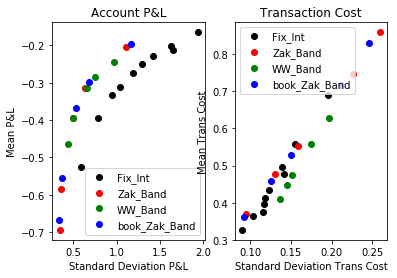

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.facecolor']=(1,1,1,1)
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Account P&L')
ax1.set_xlabel('Standard Deviation P&L')
ax1.set_ylabel('Mean P&L')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Transaction Cost')
ax2.set_xlabel('Standard Deviation Trans Cost')
ax2.set_ylabel('Mean Trans Cost')
ax1.plot(results['fixed_interval']['vola_PnL'], results['fixed_interval']['avg_PnL'], 'ko', label='Fix_Int')
ax1.plot(results['Zak_Band']['vola_PnL'], results['Zak_Band']['avg_PnL'],  'ro', label='Zak_Band')
ax1.plot(results['WW_Band']['vola_PnL'], results['WW_Band']['avg_PnL'], 'go', label='WW_Band')
ax1.plot(book_results['Zak_Band']['vola_PnL'], book_results['Zak_Band']['avg_PnL'], 'bo', label='book_Zak_Band')
ax2.plot(results['fixed_interval']['vola_trans_cost'], results['fixed_interval']['avg_trans_cost'], 'ko', label='Fix_Int')
ax2.plot(results['Zak_Band']['vola_trans_cost'], results['Zak_Band']['avg_trans_cost'], 'ro', label='Zak_Band')
ax2.plot(results['WW_Band']['vola_trans_cost'], results['WW_Band']['avg_trans_cost'], 'go', label='WW_Band')
ax2.plot(book_results['Zak_Band']['vola_trans_cost'], book_results['Zak_Band']['avg_trans_cost'], 'bo', label='book_Zak_Band')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

###Short a Put
1. Differ in Realized_vol and Implied_vol

###Future Works:
1.	realized vol 0.2    implied vol 0.4
2.	On the money   In the money

Differ between realized_vol and implied_volatility

1. implied_vol > realized_vol : realized_vol 0.2, implied_vol 0.4

2. implied_vol < realized_vol : realized_vol 0.4, implied_vol 0.2

3. implied_vol = realized_vol : realized_vol 0.3, implied_vol 0.3

In [ ]:
from deltaHedging import *
results_benchmark = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_1 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.2, 0.4, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_2 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.4, 0.2, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)


In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.facecolor']=(1,1,1,1)
def plot_mean_var(results):
	fig = plt.figure()
	ax1 = fig.add_subplot(1, 2, 1)
	ax1.set_title('Account P&L')
	ax1.set_xlabel('Standard Deviation P&L')
	ax1.set_ylabel('Mean P&L')
	ax2 = fig.add_subplot(1, 2, 2)
	ax2.set_title('Transaction Cost')
	ax2.set_xlabel('Standard Deviation Trans Cost')
	ax2.set_ylabel('Mean Trans Cost')
	ax1.plot(results['fixed_interval']['vola_PnL'], results['fixed_interval']['avg_PnL'], 'ko', label='Fix_Int')
	ax1.plot(results['Zak_Band']['vola_PnL'], results['Zak_Band']['avg_PnL'],  'ro', label='Zak_Band')
	ax1.plot(results['WW_Band']['vola_PnL'], results['WW_Band']['avg_PnL'], 'go', label='WW_Band')
	ax2.plot(results['fixed_interval']['vola_trans_cost'], results['fixed_interval']['avg_trans_cost'], 'ko', label='Fix_Int')
	ax2.plot(results['Zak_Band']['vola_trans_cost'], results['Zak_Band']['avg_trans_cost'], 'ro', label='Zak_Band')
	ax2.plot(results['WW_Band']['vola_trans_cost'], results['WW_Band']['avg_trans_cost'], 'go', label='WW_Band')
	ax1.legend(loc='best')
	ax2.legend(loc='best')
	plt.show()


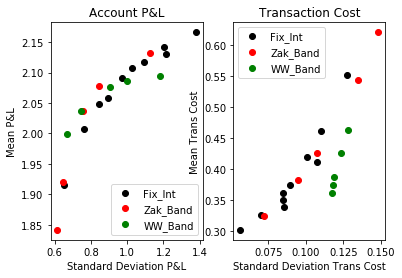

In [31]:
plot_mean_var(results_1)#realized_volatility < implied_volatility

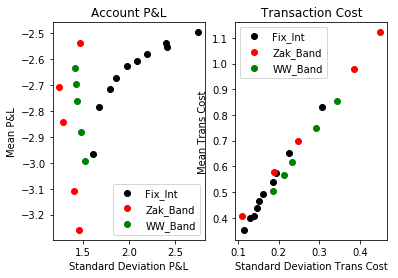

In [32]:
plot_mean_var(results_2)#realized_volatility > implied_volatility

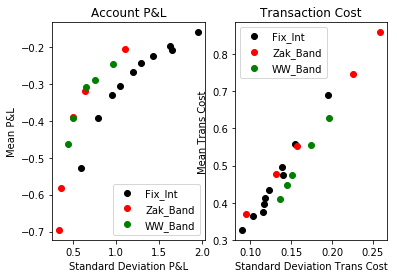

In [33]:
plot_mean_var(results_benchmark)#realized_volatility == implied_volatility

In-The-Money & Out-Of-The-Money

1. In the money Call : S_0 = 105, K = 100

2. Out of the money Call : S_0 = 95, K = 100

3. On the money Call : S_0 = 100, K = 100

4. Deep In the money Call : S_0 = 115, K = 100

5. Deep Out of the money Call : S_0 = 85, K = 100

In [10]:
results_ITC = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, 105, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_OTC = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, 95, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_benchmark = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_DITC = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, 115, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)
results_DOTC = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, 85, STRIKE, INTEREST_RATE,
									OPTION_POSITION, OPTION_TYPE, MC_PATHS_NUM, ONE_SIDE_COST)

(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 252.70 seconds
Start to do the Zak band method...
Zak band method spend: 194.47 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 245.57 seconds
Start to do the Zak band method...
Zak band method spend: 206.48 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 250.84 seconds
Start to do the Zak band method...
Zak band method spend: 199.33 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW

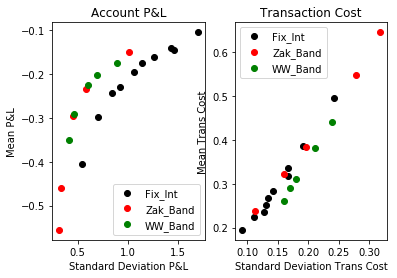

In [34]:
plot_mean_var(results_ITC)#In-The-Money

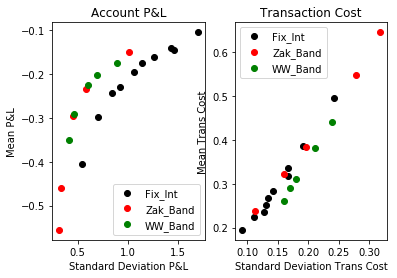

In [35]:
plot_mean_var(results_OTC)#Out-Of-The-Money

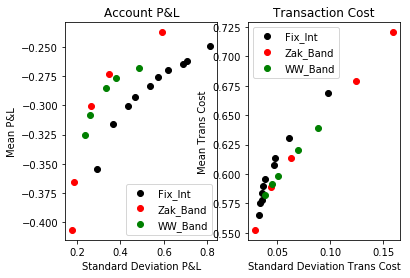

In [36]:
plot_mean_var(results_benchmark)#On-The-Money


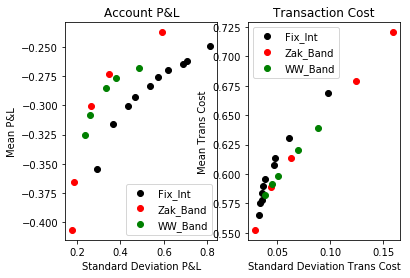

In [37]:
plot_mean_var(results_DITC)#Deep-In-The-Money

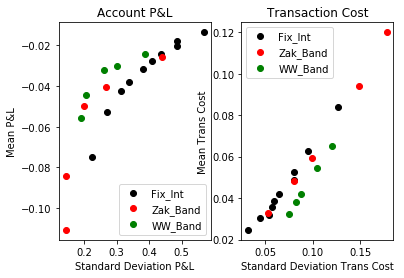

In [38]:
plot_mean_var(results_DOTC)#Deep-Out-Of-The-Money

##Long a Call

In [44]:
longcall_benchmark = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, SPOT_0, STRIKE, INTEREST_RATE,
									1, 'call', MC_PATHS_NUM, ONE_SIDE_COST)
longcall_1 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.2, 0.4, SPOT_0, STRIKE, INTEREST_RATE,
									1, 'call', MC_PATHS_NUM, ONE_SIDE_COST)
longcall_2 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.4, 0.2, SPOT_0, STRIKE, INTEREST_RATE,
									1, 'call', MC_PATHS_NUM, ONE_SIDE_COST)

(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 262.00 seconds
Start to do the Zak band method...
Zak band method spend: 205.79 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 261.52 seconds
Start to do the Zak band method...
Zak band method spend: 206.86 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 258.43 seconds
Start to do the Zak band method...
Zak band method spend: 194.36 seconds


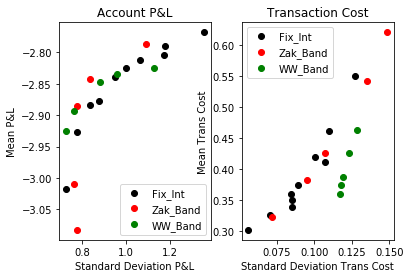

In [45]:
plot_mean_var(longcall_1)#long call, realized_volatility < implied_volatility

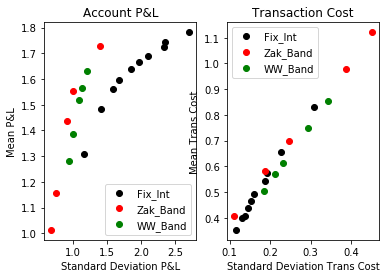

In [46]:
plot_mean_var(longcall_2)#long call, realized_volatility > implied_volatility

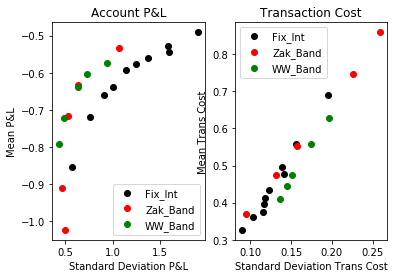

In [47]:
plot_mean_var(longcall_benchmark)#long call, realized_volatility == implied_volatility

###Short a Put
1. Differ in Realized_vol and Implied_vol

In [6]:
from deltaHedging import *
put_benchmark = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, REALIZED_VOL, IMPLIED_VOL, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, 'put', MC_PATHS_NUM, ONE_SIDE_COST)
put_1 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.2, 0.4, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, 'put', MC_PATHS_NUM, ONE_SIDE_COST)
put_2 = delta_hedging_methods(T_EXPIRATION, DAILY_STEPS, MU, 0.4, 0.2, SPOT_0, STRIKE, INTEREST_RATE,
									OPTION_POSITION, 'put', MC_PATHS_NUM, ONE_SIDE_COST)

(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 232.41 seconds
Start to do the Zak band method...
Zak band method spend: 190.73 seconds
(700000, 121)
Start to do the fixed interval re-hedging method...
Start to generate the paths under utilities:[0.15, 0.5, 1, 5, 15]
Start to do the W-W band method...
WW band method spend: 255.74 seconds
Start to do the Zak band method...
Zak band method spend: 187.52 seconds


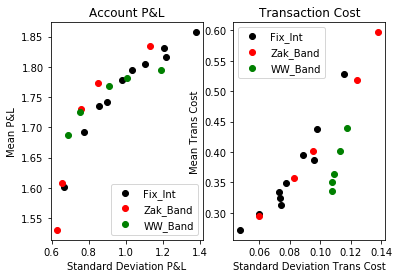

In [10]:
plot_mean_var(put_1)# Short Put, 

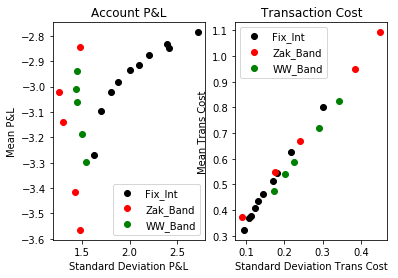

In [11]:
plot_mean_var(put_2)

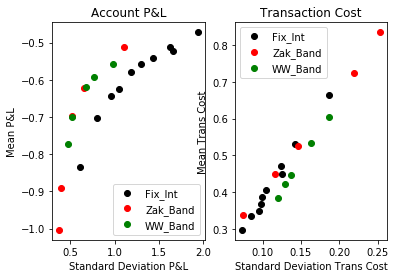

In [12]:
plot_mean_var(put_benchmark)